<a href="https://colab.research.google.com/github/TYamashita-22016/M_Math/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

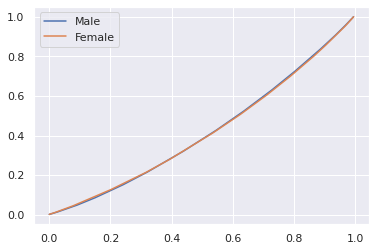

In [14]:
from numpy.ma.core import cumsum
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

import requests, zipfile
from io import StringIO
import io

from sklearn import linear_model

###ローレンツ曲線を図示する###

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student_data_math=pd.read_csv('student-mat.csv', sep=';')
#男女別にデータを分ける
student_data_math_M=student_data_math[student_data_math['sex']=='M']
student_data_math_F=student_data_math[student_data_math['sex']=='F']
#昇順に並べ替える
sort_M=student_data_math_M.G1.sort_values()
sort_F=student_data_math_F.G1.sort_values()

plt.plot(np.arange(len(sort_M))/len(sort_M), sort_M.cumsum()/sort_M.sum(), label='Male')
plt.plot(np.arange(len(sort_F))/len(sort_F), sort_F.cumsum()/sort_F.sum(), label='Female')
plt.legend()

#student_data_math_M.head()


In [47]:
###ローレンツ曲線を用いてジニ係数を求める###

#男性のジニ係数
sum=0
array_sort_M=np.array(sort_M)
for i in range(0, len(sort_M)):
  for j in range(0, len(sort_M)):
    sum += np.abs(array_sort_M[i] - array_sort_M[j])

ans_M = sum/(2*len(sort_M)*len(sort_M)*np.mean(sort_M))

#女性のジニ係数
sum=0
array_sort_F=np.array(sort_F)
for i in range(0, len(sort_F)):
  for j in range(0, len(sort_F)):
    sum += np.abs(array_sort_F[i] - array_sort_F[j])

ans_F = sum/(2*len(sort_F)*len(sort_F)*np.mean(sort_F))


print('男性のジニ係数：', ans_M)
print('女性のジニ係数：', ans_F)




男性のジニ係数： 0.17197351667939903
女性のジニ係数： 0.1723782950865341
